<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/machine-learning/titanic_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Machine Learning Competition: Predicting Titanic Survivors

* Competition Site
* Description
* Evaluation
* Data Set
* Setup Imports and Variables
* Explore the Data
* Feature: Passenger Classes
* Feature: Sex
* Feature: Embarked
* Feature: Age
* Feature: Family Size
* Final Data Preparation for Machine Learning
* Data Wrangling Summary
* Random Forest: Training
* Random Forest: Predicting
* Random Forest: Prepare for Kaggle Submission

## Competition Site

Description, Evaluation, and Data Set taken from the [competition site](https://www.kaggle.com/c/titanic-gettingStarted).

## Description

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Evaluation

The historical data has been split into two groups, a 'training set' and a 'test set'.  For the training set, we provide the outcome ( 'ground truth' ) for each passenger.  You will use this set to build your model to generate predictions for the test set.

For each passenger in the test set, you must predict whether or not they survived the sinking ( 0 for deceased, 1 for survived ).  Your score is the percentage of passengers you correctly predict.

 The Kaggle leaderboard has a public and private component.  50% of your predictions for the test set have been randomly assigned to the public leaderboard ( the same 50% for all users ).  Your score on this public portion is what will appear on the leaderboard.  At the end of the contest, we will reveal your score on the private 50% of the data, which will determine the final winner.  This method prevents users from 'overfitting' to the leaderboard.

## Data Set

| File Name        | Available Formats |
|------------------|-------------------|
| train            | .csv (59.76 kb)   |
| gendermodel      | .csv (3.18 kb)    |
| genderclassmodel | .csv (3.18 kb)    |
| test             | .csv (27.96 kb)   |
| gendermodel      | .py (3.58 kb)     |
| genderclassmodel | .py (5.63 kb)     |
| myfirstforest    | .py (3.99 kb)     |

<pre>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</pre>

## Setup Imports and Variables

In [0]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the Data

Read the data:

In [127]:
df_train = pd.read_csv('./drive/My Drive/titanic/train.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


View the data types of each column:

In [129]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

Get some basic information on the DataFrame:

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin, and Embarked are missing values.  Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

Generate various descriptive statistics on the DataFrame:

In [131]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now that we have a general idea of the data set contents, we can dive deeper into each column.  We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

Text(0.5,1,'Age Histogram')

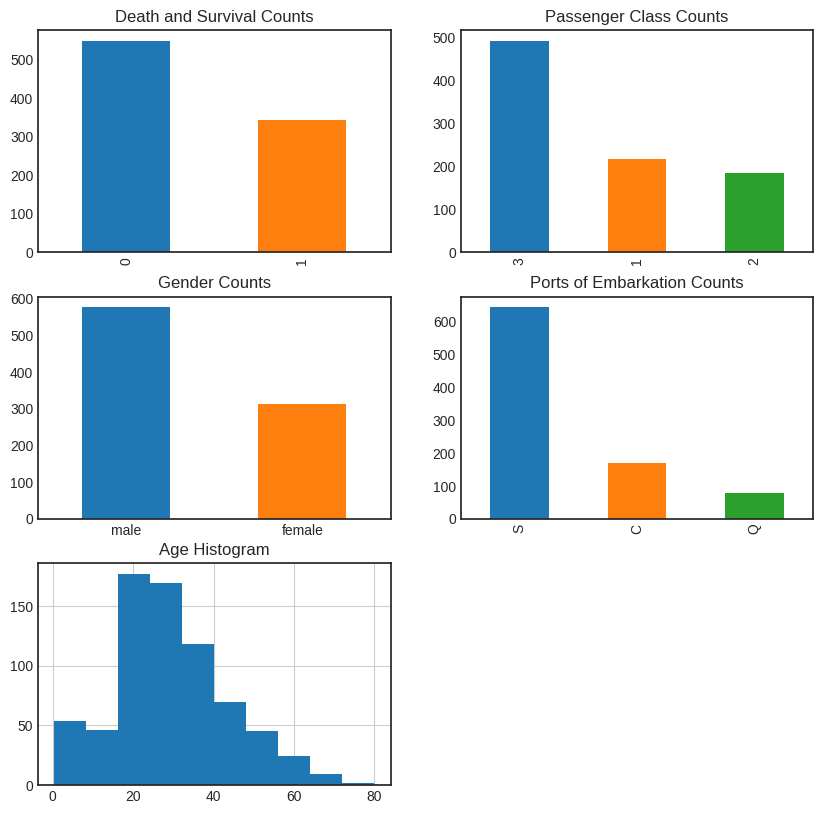

In [132]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

Next we'll explore various features to view their impact on survival rates.

## Feature Selector

### Feature Selector-Missing Values

In [133]:
from feature_selector import FeatureSelector
train_labels = df_train['Survived']
train = df_train.drop(columns = ['Survived', 'Name', 'Ticket', 'PassengerId'])
fs = FeatureSelector(data = train, labels = train_labels)
train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
5,3,male,NaN,0,0,8.4583,NaN,Q
6,1,male,54.0,0,0,51.8625,E46,S
7,3,male,2.0,3,1,21.0750,NaN,S
8,3,female,27.0,0,2,11.1333,NaN,S
9,2,female,14.0,1,0,30.0708,NaN,C


In [134]:
fs.identify_missing(missing_threshold=0.7)

1 features with greater than 0.70 missing values.



In [135]:
fs.ops['missing']

['Cabin']

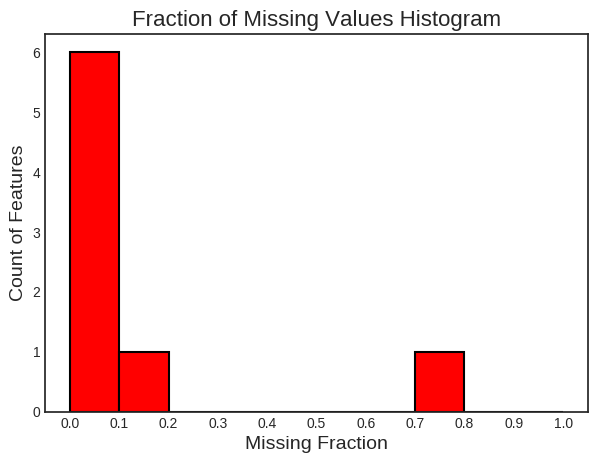

In [136]:
fs.plot_missing()

In [137]:
fs.missing_stats.head(10)

,missing_fraction
Cabin,0.771044
Age,0.198653
Embarked,0.002245
Pclass,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000
Fare,0.000000


### Feature Selector-Collinear



In [138]:
fs.identify_collinear(correlation_threshold=0.70)

0 features with a correlation magnitude greater than 0.70.



In [139]:
fs.ops['collinear']

[]

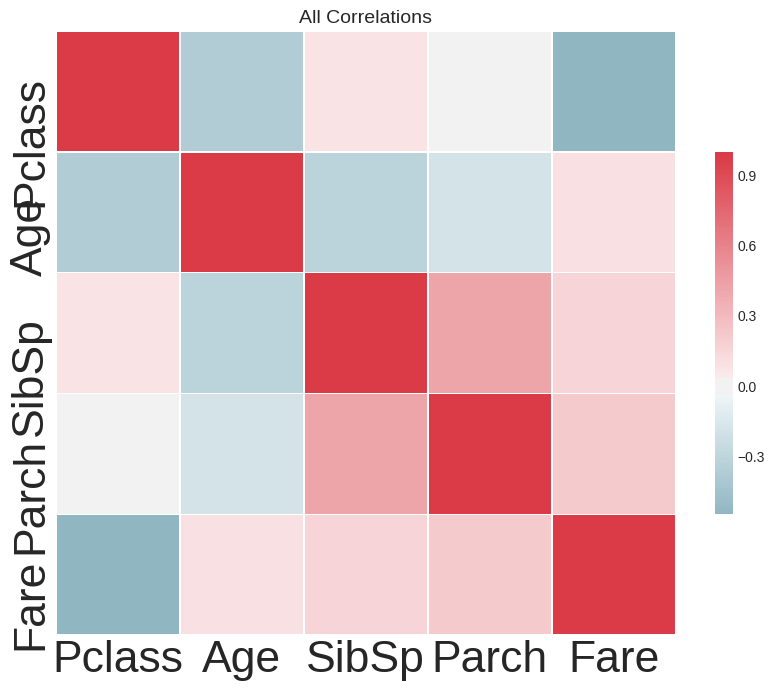

In [140]:
fs.plot_collinear(plot_all=True)

In [141]:
fs.record_collinear

,drop_feature,corr_feature,corr_value


In [142]:
fs.corr_matrix

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


In [143]:
fs.data.shape, fs.labels.shape

((891, 8), (891,))

### Feature Selector-Unique

In [144]:
fs.identify_single_unique()

0 features with a single unique value.



In [145]:
fs.ops['single_unique']

[]

In [146]:
fs.unique_stats.sample(8)

,nunique
Fare,248
Parch,7
Cabin,147
Age,88
Embarked,3
Sex,2
SibSp,7
Pclass,3


### Feature Selector-Importance

In [147]:
train_no_missing = fs.remove(methods = ['missing'])
train_no_missing.info()

Removed 1 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [148]:
fs = FeatureSelector(data = train_no_missing, labels = train_labels)
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 20, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[278]	valid_0's auc: 0.843
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.868617
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[357]	valid_0's auc: 0.903721
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[63]	valid_0's auc: 0.892952
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[40]	valid_0's auc: 0.890162
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[33]	valid_0's auc: 0.868403
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[159]	valid_0's auc: 0.826467
Training until validation scores don't improve for 100 rounds.
Early stopping,

In [149]:
fs.ops['zero_importance']

[]

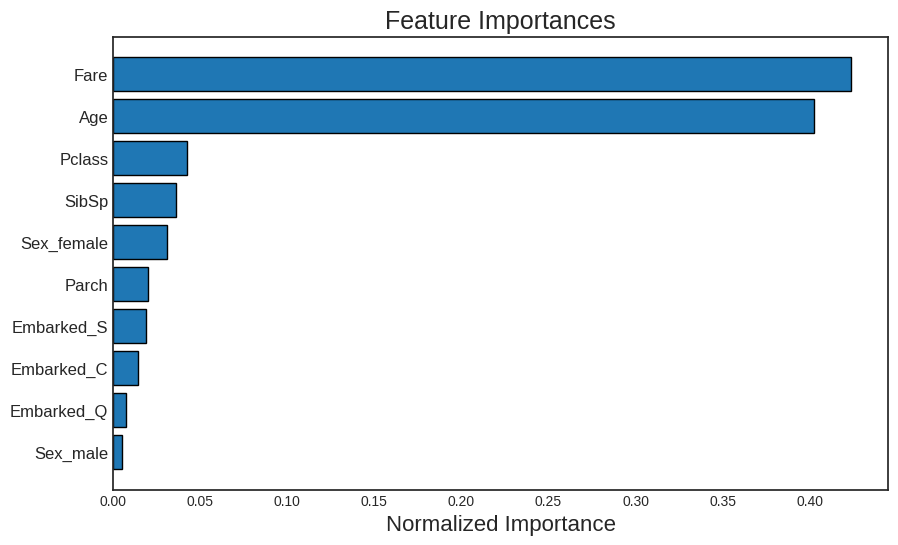

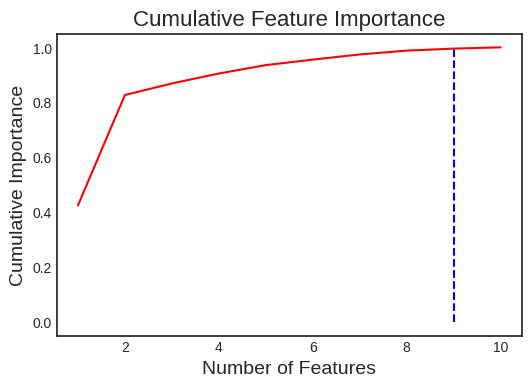

9 features required for 0.99 of cumulative importance


In [150]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 10)

In [151]:
list(fs.feature_importances.loc[:7, 'feature'])

['Fare',
 'Age',
 'Pclass',
 'SibSp',
 'Sex_female',
 'Parch',
 'Embarked_S',
 'Embarked_C']

In [152]:
fs.identify_low_importance(cumulative_importance = 0.99)

8 features required for cumulative importance of 0.99 after one hot encoding.
2 features do not contribute to cumulative importance of 0.99.



In [153]:
fs.ops['low_importance']

['Embarked_Q', 'Sex_male']

### Feature Selector-Removing Features

In [154]:
removal = fs.check_removal()
len(removal)

Total of 2 features identified for removal


2

In [155]:
train_no_missing_zero = fs.remove(methods = ['zero_importance'])
train_no_missing_zero.info()

Removed 0 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Pclass        891 non-null int64
Sex           891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
dtypes: float64(2), int64(3), object(2), uint8(5)
memory usage: 53.2+ KB


In [156]:
train_no_low = fs.remove(methods = ['low_importance'])
train_no_low.info()

Removed 2 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Sex_female    891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
Pclass        891 non-null int64
Sex           891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
dtypes: float64(2), int64(3), object(2), uint8(3)
memory usage: 51.4+ KB


In [157]:
train_removed = fs.remove(methods = 'all')

['zero_importance', 'low_importance'] methods have been run

Removed 2 features.


In [158]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed.shape[1])
train_removed.columns

Original Number of Features 8
Final Number of Features:  10


Index(['Sex_female', 'Embarked_C', 'Embarked_S', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [159]:
train_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Sex_female    891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
Pclass        891 non-null int64
Sex           891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
dtypes: float64(2), int64(3), object(2), uint8(3)
memory usage: 51.4+ KB


In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


## Feature: Passenger Classes

From our exploratory data analysis in the previous section, we see there are three passenger classes: First, Second, and Third class.  We'll determine which proportion of passengers survived based on their passenger class.

Generate a cross tab of Pclass and Survived:

In [161]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
#pclass_xt.sum(axis=1)
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Plot the cross tab:

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


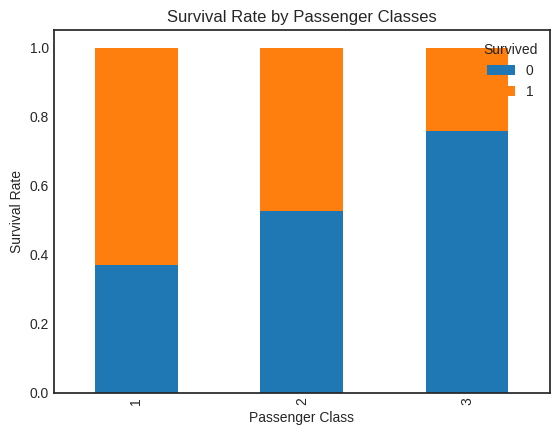

In [162]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(axis=1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
pclass_xt_pct

We can see that passenger class seems to have a significant impact on whether a passenger survived.  Those in First Class the highest chance for survival.

## Feature: Sex

Gender might have also played a role in determining a passenger's survival rate.  We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of Sex from a string to a number representation:

In [163]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

Transform Sex from a string to a number representation:

In [164]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Plot a normalized cross tab for Sex_Val and Survived:

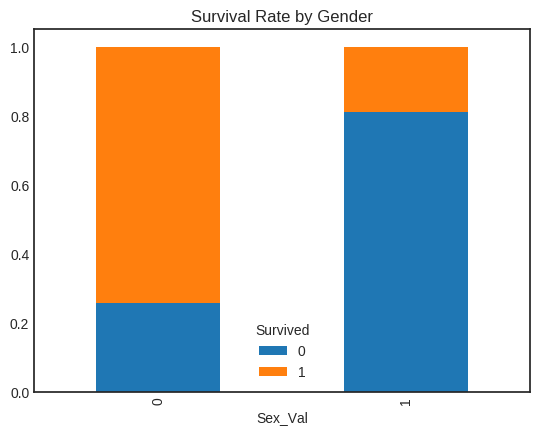

In [165]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

The majority of females survived, whereas the majority of males did not.

Next we'll determine whether we can gain any insights on survival rate by looking at both Sex and Pclass.

Count males and females in each Pclass:

In [166]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print ('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print ('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Plot survival rate by Sex and Pclass:

Text(0,0.5,'Survival Rate')

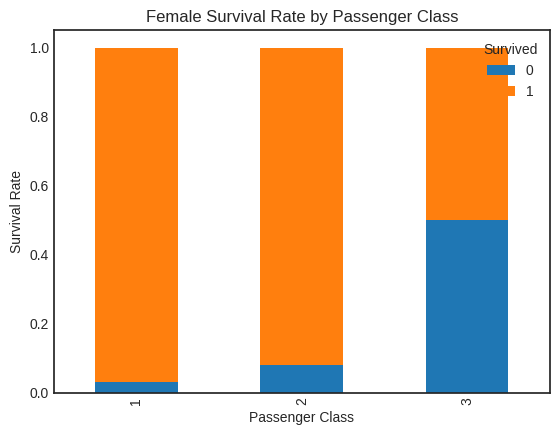

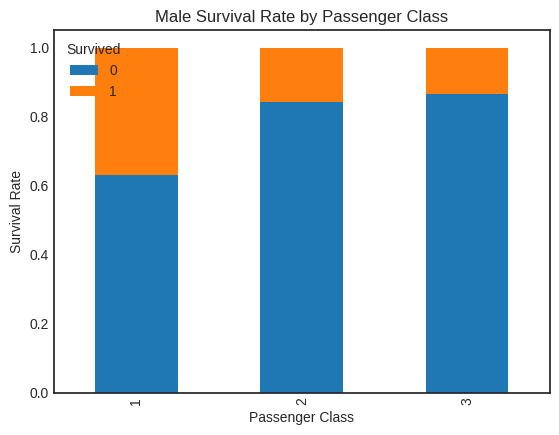

In [167]:
# Plot survival rate by Sex
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

The vast majority of females in First and Second class survived.  Males in First class had the highest chance for survival.

## Feature: Embarked

The Embarked column might be an important feature but it is missing a couple data points which might pose a problem for machine learning algorithms:

In [168]:
df_train[df_train['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


Since the vast majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S': 

In [0]:
from numpy import nan
df_train.replace({'Embarked' : 
               { np.nan : 'S' 
               }
           }, 
           inplace=True)

Verify we do not have any more NaNs for Embarked:

In [170]:
embarked_locs = sorted(df_train['Embarked'].unique())
embarked_locs

['C', 'Q', 'S']

Prepare to map Embarked from a string to a number representation:

In [171]:
# Get the unique values of Embarked
embarked_locs = sorted(df_train['Embarked'].unique())

embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(1, len(embarked_locs) + 1)))
embarked_locs_mapping

{'C': 1, 'Q': 2, 'S': 3}

Transform Embarked from a string to a number representation to prepare it for machine learning algorithms:

In [172]:
df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3


Plot the histogram for Embarked_Val:

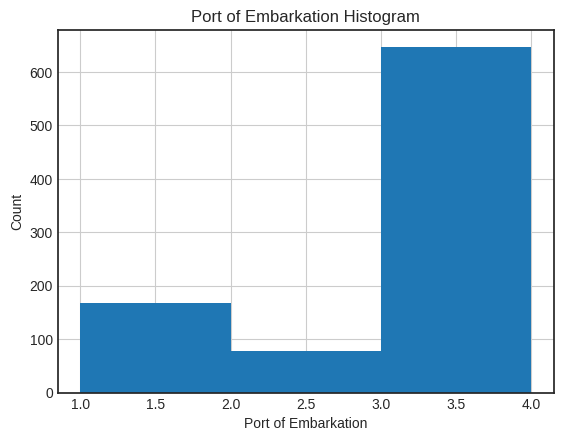

In [173]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(1, 4))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Plot a normalized cross tab for Embarked_Val and Survived:

Text(0,0.5,'Survival Rate')

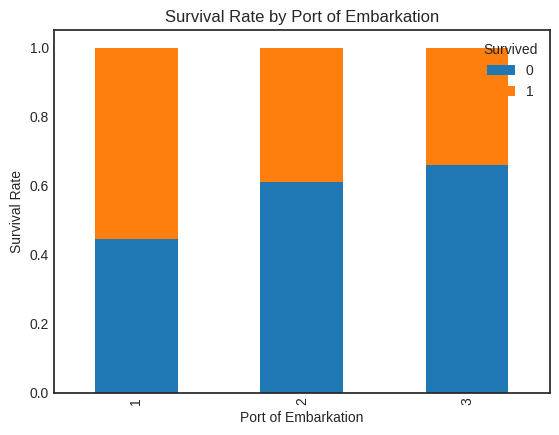

In [174]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

In [175]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[1, 2, 3]

It appears those that embarked in location 'C': 1 had the highest rate of survival.  We'll dig in some more to see why this might be the case.  Below we plot a graphs to determine gender and passenger class makeup for each port:

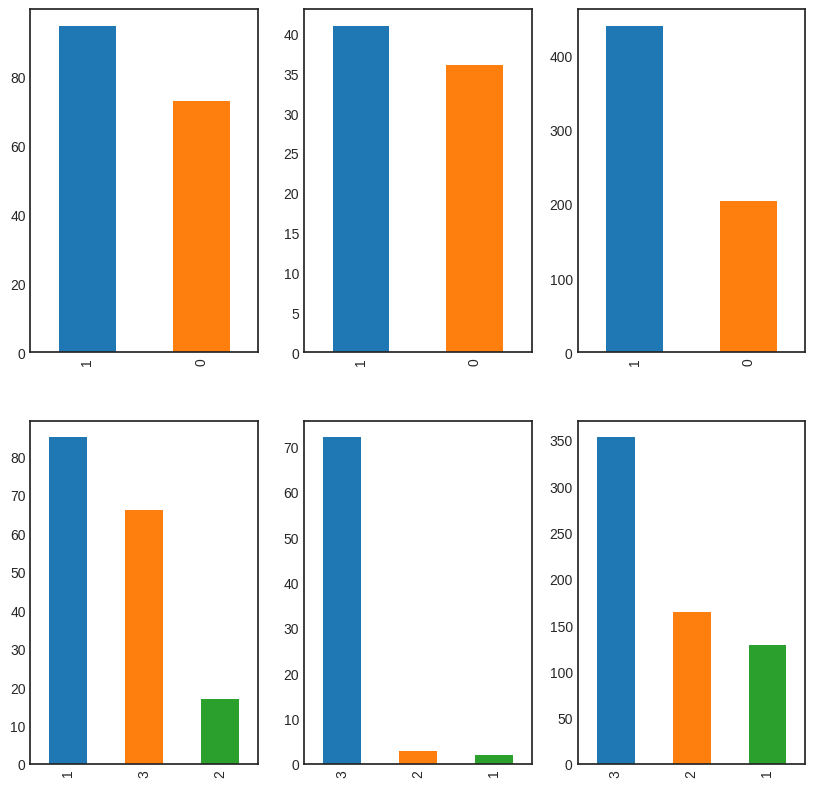

In [176]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 

rows = 2
cols = 3
col_names = ('Sex_Val', 'Pclass')

for portIdx in embarked_locs:
    for colIdx in range(0, len(col_names)):
        plt.subplot2grid((rows, cols), (colIdx, portIdx - 1))
        df_train[df_train['Embarked_Val'] == portIdx][col_names[colIdx]] \
            .value_counts().plot(kind='bar')

Leaving Embarked as integers implies ordering in the values, which does not exist.  Another way to represent Embarked without ordering is to create dummy variables:

In [177]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_1,Embarked_Val_2,Embarked_Val_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3,0,0,1


## Feature: Age

The Age column seems like an important feature--unfortunately it is missing many values.  We'll need to fill in the missing values like we did with Embarked.

Filter to view missing Age values:

In [178]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Determine the Age typical for each passenger class by Sex_Val.  We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [0]:
# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

Ensure AgeFill does not contain any missing values:

In [180]:
len(df_train[df_train['AgeFill'].isnull()])

0

Plot a normalized cross tab for AgeFill and Survived:

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0,0.5,'Age')

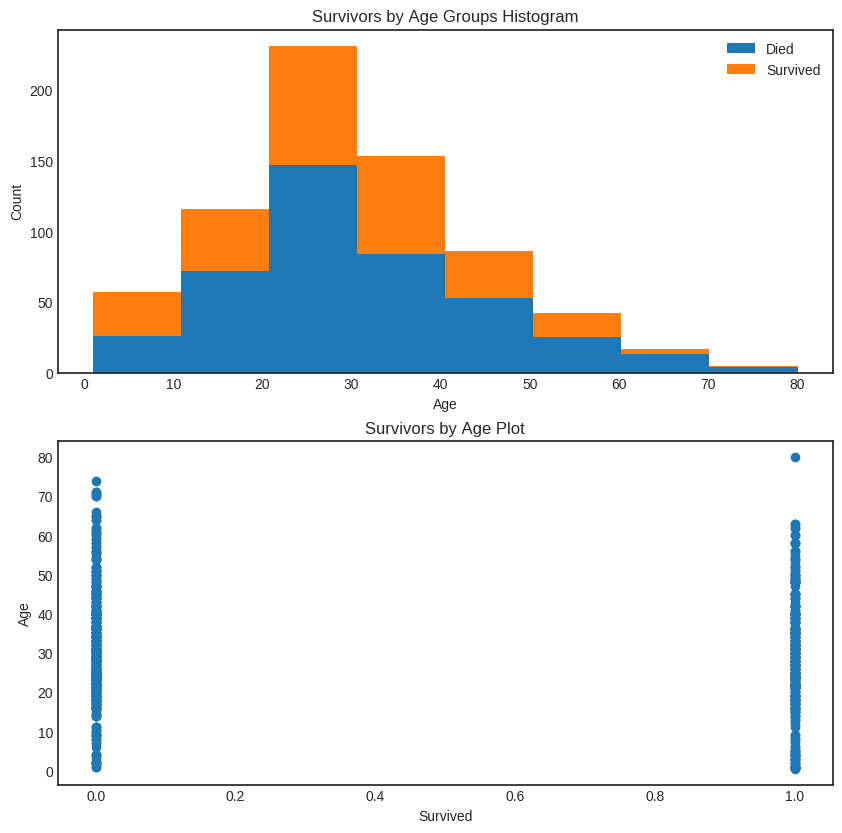

In [181]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])

axes[0].hist([df1, df2], 
             bins=(int)(max_age / bin_size),
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

Unfortunately, the graphs above do not seem to clearly show any insights.  We'll keep digging further.

Plot AgeFill density by Pclass:

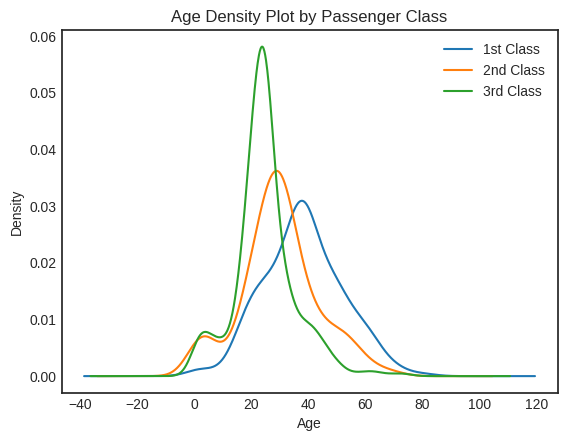

In [182]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.  We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

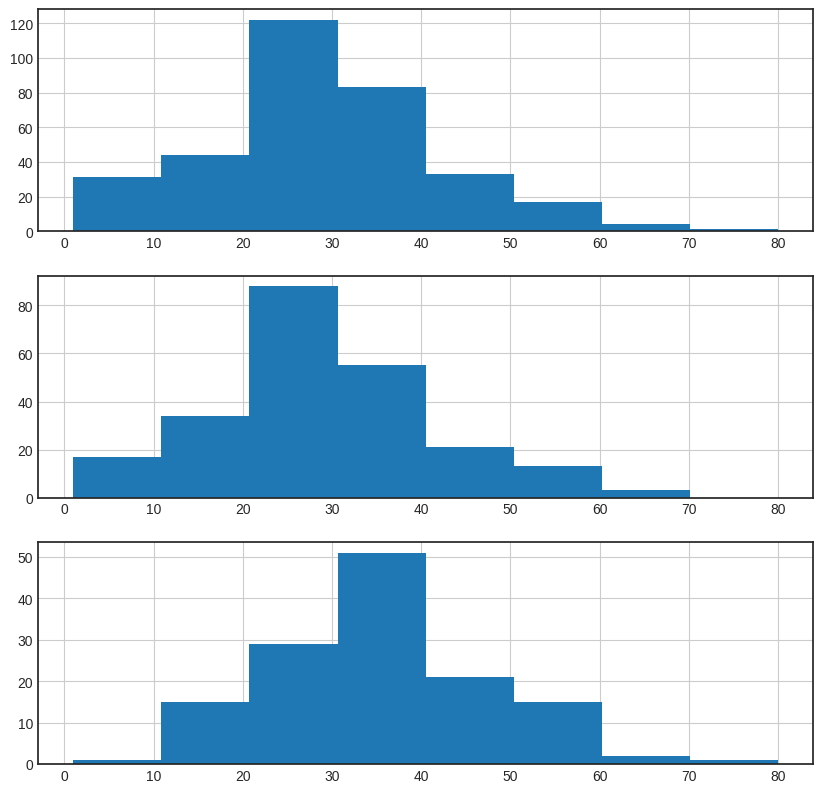

In [183]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the AgeFill histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=(int)(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=(int)(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=(int)(max_age / bin_size), range=(1, max_age))

In the first graph, we see that most survivors come from the 20's to 30's age ranges and might be explained by the following two graphs.  The second graph shows most females are within their 20's.  The third graph shows most first class passengers are within their 30's.

## Feature: Family Size

Feature enginering involves creating new features or modifying existing features which might be advantageous to a machine learning algorithm.

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [184]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_1,Embarked_Val_2,Embarked_Val_3,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3,0,0,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3,0,0,1,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,0,0,1,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3,0,0,1,35.0,0


Plot a histogram of FamilySize:

Text(0.5,1,'Family Size Histogram')

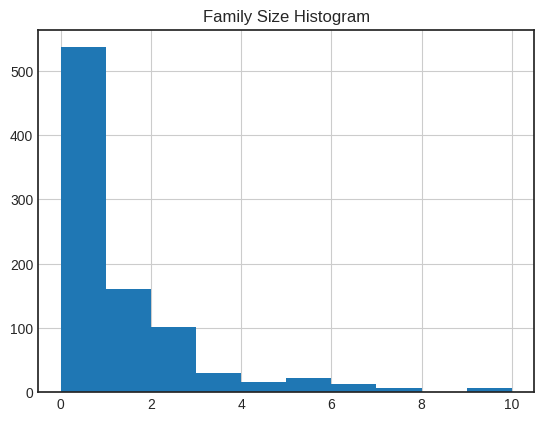

In [185]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

Plot a histogram of AgeFill segmented by Survived:

Text(0.5,1,'Survivors by Family Size')

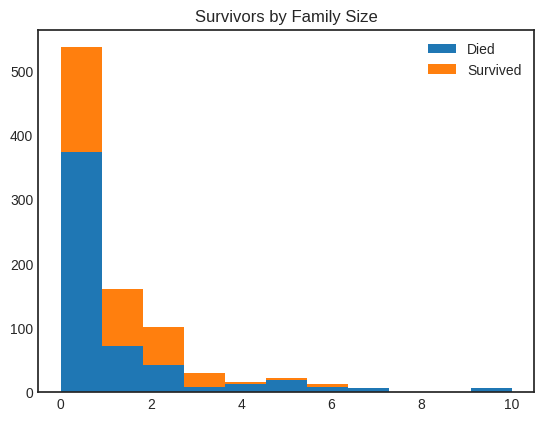

In [186]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Based on the histograms, it is not immediately obvious what impact FamilySize has on survival.  The machine learning algorithms might benefit from this feature.

Additional features we might want to engineer might be related to the Name column, for example honorrary or pedestrian titles might give clues and better predictive power for a male's survival.

## Final Data Preparation for Machine Learning

Many machine learning algorithms do not work on strings and they usually require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' (strings):

In [187]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

Drop the columns we won't use:

In [0]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], 
                         axis=1)

Drop the following columns:
* The Age column since we will be using the AgeFill column instead.
* The SibSp and Parch columns since we will be using FamilySize instead.
* The PassengerId column since it won't be used as a feature.
* The Embarked_Val as we decided to use dummy variables instead.

In [189]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
df_train.dtypes

Survived            int64
Pclass              int64
Fare              float64
Sex_Val             int64
Embarked_Val_1      uint8
Embarked_Val_2      uint8
Embarked_Val_3      uint8
AgeFill           float64
FamilySize          int64
dtype: object

Convert the DataFrame to a numpy array:

In [190]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  1.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  1.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  1.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  0.    , 32.    ,  0.    ]])

## Data Wrangling Summary

Below is a summary of the data wrangling we performed on our training data set.  We encapsulate this in a function since we'll need to do the same operations to our test set later.

In [0]:
def clean_data(df, drop_passenger_id):
    
    # Get the unique values of Sex
    sexes = sorted(df['Sex'].unique())
    
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    
    # Fill in missing values of Embarked
    # Since the vast majority of passengers embarked in 'S': 3, 
    # we assign the missing values in Embarked to 'S':
    if len(df[df['Embarked'].isnull()] > 0):
        df.replace({'Embarked' : 
                       { np.nan : 'S' 
                       }
                   }, 
                   inplace=True)
  
    
    # Get the unique values of Embarked
    embarked_locs = sorted(df['Embarked'].unique())

    # Generate a mapping of Embarked from a string to a number representation        
    embarked_locs_mapping = dict(zip(embarked_locs, 
                                     range(0, len(embarked_locs) + 1)))
    
    # Transform Embarked from a string to dummy variables
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
   
    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()]) > 0:
        df.fillna(0, inplace=True)
        avg_fare = df.mean()
        df.replace({ np.nan: avg_fare }, inplace=True)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

## Random Forest: Training

Create the random forest object:

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_test1 = {'n_estimators':range(10, 400, 5)}
gsearch1= GridSearchCV(estimator = RandomForestClassifier(criterion='entropy', 
                                                          random_state=10, oob_score=True),
                       param_grid =param_test1, scoring='roc_auc', cv=5)

In [0]:
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

Fit the training data and create the decision trees:

In [441]:
gsearch1.fit(train_features, train_target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

({'mean_fit_time': array([0.01613693, 0.01985779, 0.026583  , 0.03317366, 0.03909016,
         0.0456007 , 0.05444727, 0.05792713, 0.06467099, 0.07377319,
         0.07742081, 0.08565264, 0.09069147, 0.09746099, 0.10221605,
         0.11553726, 0.11690888, 0.12212853, 0.12976184, 0.13566175,
         0.14374795, 0.14877453, 0.15652881, 0.1600204 , 0.16779699,
         0.17469392, 0.17851863, 0.19283934, 0.19398947, 0.20027785,
         0.2062387 , 0.23861899, 0.22151122, 0.22428751, 0.23265319,
         0.23796873, 0.24996934, 0.25362177, 0.25651755, 0.26612215,
         0.27185168, 0.27966399, 0.28724995, 0.29372382, 0.29994693,
         0.30442967, 0.31058087, 0.31600738, 0.3231647 , 0.33285041,
         0.34052539, 0.34509153, 0.35003171, 0.35767193, 0.36620684,
         0.38012557, 0.38492923, 0.38831062, 0.39652209, 0.39885559,
         0.40032487, 0.41083226, 0.41362066, 0.42319202, 0.42747073,
         0.44231296, 0.4377377 , 0.4471745 , 0.4560638 , 0.47046862,
         0.465350

In [0]:
'''
param_test2 = {'max_depth':range(3,50,2), 'min_samples_split':range(2,201,20)}
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, criterion='entropy',
                       random_state=10, oob_score=True),
                       param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
'''

In [0]:
'''
gsearch2.fit(train_features, train_target)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_
'''

In [0]:
# Fit the model to our training data
clf = RandomForestClassifier(n_estimators= 75, criterion='entropy',
                             random_state=10)
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9809203142536476'

In [0]:
'''
param_test3= {'min_samples_split':range(2,50,2), 'min_samples_leaf':range(1,60,5)}
gsearch3= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=11,
                                   min_samples_split=22, random_state=10, oob_score=True),
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
'''

In [0]:
'''
gsearch3.fit(train_features, train_target)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_
'''

In [0]:
# Fit the model to our training data
clf = RandomForestClassifier(n_estimators= 70, criterion='entropy',
                             random_state=10, oob_score=True)
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9809203142536476'

In [0]:
param_test4= {'max_features':range(3, 9, 1)}
gsearch4= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 75,
                                                          random_state=10, oob_score=True),
                       param_grid = param_test4,scoring='roc_auc',iid=False, cv=5)

In [444]:
gsearch4.fit(train_features, train_target)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

({'mean_fit_time': array([0.09667687, 0.09683833, 0.09861879, 0.10429201, 0.10813308,
         0.11479206]),
  'mean_score_time': array([0.00491014, 0.00449576, 0.00447035, 0.00434842, 0.00447803,
         0.00470443]),
  'mean_test_score': array([0.86334801, 0.86437979, 0.8664974 , 0.86352856, 0.86317366,
         0.8624289 ]),
  'mean_train_score': array([0.99745541, 0.99750699, 0.99750871, 0.99743382, 0.99748054,
         0.99743386]),
  'param_max_features': masked_array(data=[3, 4, 5, 6, 7, 8],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 3},
   {'max_features': 4},
   {'max_features': 5},
   {'max_features': 6},
   {'max_features': 7},
   {'max_features': 8}],
  'rank_test_score': array([4, 2, 1, 3, 5, 6], dtype=int32),
  'split0_test_score': array([0.82812912, 0.83300395, 0.83517787, 0.82325428, 0.8201581 ,
         0.82575758]),
  'split0_train_score': array([0.99765117, 0.997

In [445]:
# Fit the model to our training data
clf = RandomForestClassifier(n_estimators= 75, max_features=5, criterion='entropy',
                             random_state=10, oob_score=True)
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9809203142536476'

## Random Forest: Predicting

Read the test data:

In [405]:
df_test = pd.read_csv('./drive/My Drive/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Note the test data does not contain the column 'Survived', we'll use our trained model to predict these values.

In [406]:
# Data wrangle the test set and convert it to a numpy array
df_test = clean_data(df_test, drop_passenger_id=False)
test_data = df_test.values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId       418 non-null int64
Pclass            418 non-null int64
Fare              418 non-null float64
Sex_Val           418 non-null int64
Embarked_Val_C    418 non-null uint8
Embarked_Val_Q    418 non-null uint8
Embarked_Val_S    418 non-null uint8
AgeFill           418 non-null float64
FamilySize        418 non-null int64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


Take the decision trees and run it on the test data:

In [0]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = test_data[:, 1:]

# Predict the Survival values for the test data
test_y = clf.predict(test_x)


## Random Forest: Prepare for Kaggle Submission

Create a DataFrame by combining the index from the test data with the output of predictions, then write the results to the output:

In [0]:
df_test['Survived'] = test_y
df_test[['PassengerId', 'Survived']] \
    .to_csv('./drive/My Drive/titanic/results-rf.csv', index=False)

## Evaluate Model Accuracy

Submitting to Kaggle will give you an accuracy score.  It would be helpful to get an idea of accuracy without submitting to Kaggle.

We'll split our training data, 80% will go to "train" and 20% will go to "test":

In [192]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.2, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 8) (891,)
(712, 8) (712,)
(179, 8) (179,)


Use the new training data to fit the model, predict, and get the accuracy score:

In [412]:
clf = RandomForestClassifier(n_estimators= 75, max_features=5, criterion='entropy',
                             random_state=10, oob_score=True, class_weight='balanced')
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

from sklearn.metrics import roc_auc_score
print ("AUC - ROC : ", roc_auc_score(test_y, predict_y))


feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = df_test.columns.drop(['Survived', 'PassengerId']),
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

Accuracy = 0.85
AUC - ROC :  0.8286561264822135


,importance
Fare,0.294348
AgeFill,0.289098
Sex_Val,0.220637
Pclass,0.078821
FamilySize,0.074477
Embarked_Val_S,0.017327
Embarked_Val_C,0.015442
Embarked_Val_Q,0.009850


View the Confusion Matrix:

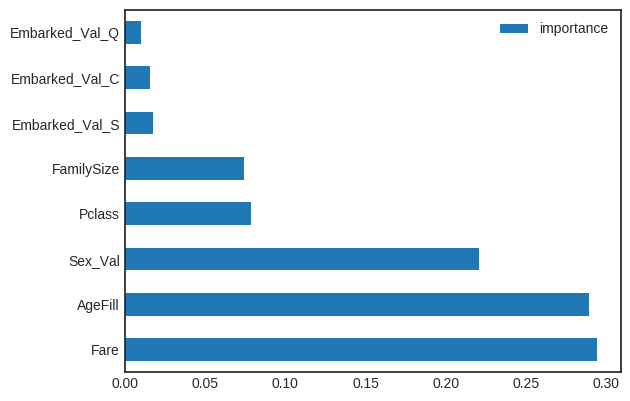

In [415]:
feature_importances.plot(kind='barh')

|      | condition True | condition false|
|------|----------------|---------------|
|prediction true|True Positive|False positive|
|Prediction False|False Negative|True Negative|

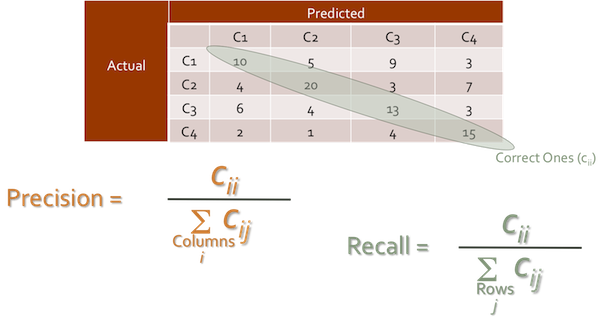

In [0]:
from IPython.core.display import Image 
Image(filename='./drive/My Drive/titanic/confusion_matrix.png', width=800)

Get the model score and confusion matrix:

In [416]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ")
print (confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.85 

Confusion Matrix 
[[101   9]
 [ 18  51]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 101 |   9 |
Actual   |-----|-----|
       1 |  18 |  51 |
         |-----|-----|


Display the classification report:

$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

In [417]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.92      0.88       110
    Survived       0.85      0.74      0.79        69

 avg / total       0.85      0.85      0.85       179



## Support Vector Machine

In [0]:
from sklearn import metrics
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [419]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

from sklearn.metrics import roc_auc_score
print ("AUC - ROC : ", roc_auc_score(test_y, predict_y))

Accuracy = 0.79
AUC - ROC :  0.7732542819499342


In [420]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ")
print (confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.79 

Confusion Matrix 
[[92 18]
 [20 49]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 |  92 |  18 |
Actual   |-----|-----|
       1 |  20 |  49 |
         |-----|-----|


## Gradient Boosting

In [0]:
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
        learning_rate=0.3, n_estimators=400, random_state=0)

In [422]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)


from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

from sklearn.metrics import roc_auc_score
print ("AUC - ROC : ", roc_auc_score(test_y, predict_y))



Accuracy = 0.82
AUC - ROC :  0.8140316205533596


In [423]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ")
print (confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.82 

Confusion Matrix 
[[93 17]
 [15 54]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 |  93 |  17 |
Actual   |-----|-----|
       1 |  15 |  54 |
         |-----|-----|


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.3, n_estimators=400, random_state=0)

In [427]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)


from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

from sklearn.metrics import roc_auc_score
print ("AUC - ROC : ", roc_auc_score(test_y, predict_y))

model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ")
print (confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Accuracy = 0.84
AUC - ROC :  0.8214097496706194
Model Score 0.84 

Confusion Matrix 
[[101   9]
 [ 19  50]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 101 |   9 |
Actual   |-----|-----|
       1 |  19 |  50 |
         |-----|-----|


In [428]:
print("n_estimators: %d" % clf.n_estimators)
print(clf.train_score_.shape)

n_estimators: 400
(400,)


In [429]:
print(clf.init_)

In [430]:
print(clf.estimators_)

[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7fadf30f1900>,
           splitter='best')]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7fadf30f1900>,
           splitter='best')]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,

## LightGBM

### Hyperopt

In [0]:
train_removed = train_removed.drop(columns=['Sex', 'Embarked'])
train_data = train_removed.values

In [309]:
from sklearn.model_selection import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_data, 
                                                    train_labels, 
                                                    test_size=0.2, 
                                                    random_state=0)
'''
m = np.nanmean(train_x, axis=0)
s = np.nanstd(train_x, axis=0)
train_x = (train_x - m) / s 
test_x  = (test_x - m) / s
'''
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(712, 8) (712,)
(179, 8) (179,)


In [0]:
import csv

out_file = 'lgbm_titanics.csv'
of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

writer.writerow(['loss', 'params', 'iteration', 'estimators', 'train_time'])
of_connection.close()

In [0]:
from timeit import default_timer as timer
import lightgbm as lgb
from hyperopt import STATUS_OK

MAX_EVALS = 200

N_FOLDS = 10

train_set = lgb.Dataset(train_x, label = train_y)

def objective(params, n_folds = N_FOLDS):
    #會紀錄最後的運行紀錄
    global ITERATION
    ITERATION += 1
    subsample = params['boosting_type'].get('subsample', 1.0)
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
        params[parameter_name] = int(params[parameter_name])
    #準備計算跑model的時間
    start = timer()
    #交叉驗證 early_stopping_rounds是指超過100次都沒有改善的話就會停止模型
    cv_results = lgb.cv(params, train_set, num_boost_round=10000, nfold=n_folds,
                        stratified=False, shuffle=True, metrics='auc',
                        early_stopping_rounds=100, verbose_eval=False, show_stdv=True)
    
    #總運行時間
    run_time = timer() - start
    loss = -np.max(cv_results['auc-mean'])
    
    #estimators(樹的數量)
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)
    
    of_connection = open(out_file, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, params, ITERATION, n_estimators, run_time])
    
    return {'loss': loss, 'params': params, 'iteration': ITERATION,
            'estimators': n_estimators, 
            'train_time': run_time, 'status': STATUS_OK}

In [0]:
from hyperopt import hp
space = {
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    #subsample代表為採樣數
    #因為'goss'並無區分是否含有採樣數 所以給予1(不採樣)
    'boosting_type': hp.choice('boosting_type', [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                                 #{'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                                 {'boosting_type': 'goss', 'subsample': 1.0}]),
    'max_depth': hp.choice('max_depth', np.arange(3, 20, dtype=int)), 
    'num_leaves': hp.quniform('num_leaves', 15, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 100000, 300000, 10000),
    'min_child_samples': hp.quniform('min_child_samples', 15, 40, 2),
    'reg_alpha': hp.uniform('reg_alpha', 0.1, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.1, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)}

In [0]:
from hyperopt import tpe
tpe_algorithm = tpe.suggest

from hyperopt import Trials
# Keep track of results
bayes_trials = Trials()

In [381]:
from hyperopt import fmin

# Global variable
global  ITERATION
ITERATION = 0
#ITERATION可以讓我們看iteration的數量
# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest,
            max_evals = MAX_EVALS, trials = bayes_trials, rstate = np.random.RandomState(50))

100%|██████████| 200/200 [02:31<00:00,  1.54it/s, best loss: -0.8728768194860939]


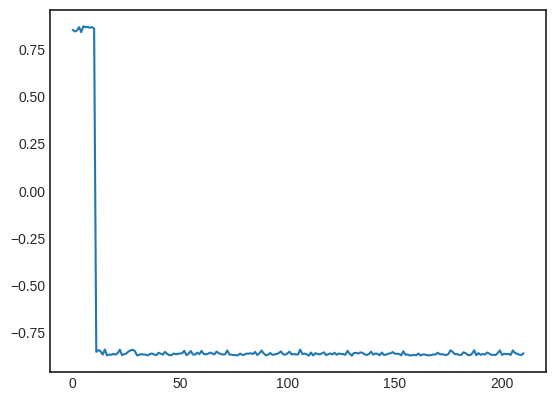

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results1=pd.read_csv('lgbm_titanics.csv')
plt.plot(results1['loss'])

In [383]:
results = pd.read_csv('lgbm_titanics.csv')
#找出最低的loss 並排序
results.sort_values('loss', ascending = True, inplace = True)
results.reset_index(inplace = True, drop = True)
results.head()

,loss,params,iteration,estimators,train_time
0,-0.872877,"{'boosting_type': 'gbdt', 'class_weight': None...",100,43,0.449221
1,-0.872809,"{'boosting_type': 'gbdt', 'class_weight': 'bal...",120,72,0.341427
2,-0.871993,"{'boosting_type': 'gbdt', 'class_weight': 'bal...",102,51,0.485022
3,-0.871901,"{'boosting_type': 'gbdt', 'class_weight': 'bal...",147,99,0.554266
4,-0.871868,"{'boosting_type': 'gbdt', 'class_weight': 'bal...",6,95,0.594133


In [389]:
import ast

best_bayes_estimators = int(results.loc[0, 'estimators'])
best_bayes_params = ast.literal_eval(results.loc[0, 'params']).copy()

best_bayes_model = lgb.LGBMClassifier(n_estimators=best_bayes_estimators, n_jobs = -1, 
                                      objective = 'binary', random_state = 50)

best_bayes_model.set_params(**best_bayes_params)
best_bayes_model.fit(train_x, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.6666090484895127,
        learning_rate=0.194357938006029, max_depth=11, metric='auc',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=43, n_jobs=-1, num_leaves=22, objective='binary',
        random_state=50, reg_alpha=0.6246310301299383,
        reg_lambda=0.35937527852829754, silent=True,
        subsample=0.6392034834989245, subsample_for_bin=270000,
        subsample_freq=1, verbose=1)

In [388]:
predict_y = best_bayes_model.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

from sklearn.metrics import roc_auc_score
print ("AUC - ROC : ", roc_auc_score(test_y, predict_y))

Accuracy = 0.84
AUC - ROC :  0.8114624505928854


In [386]:
from sklearn import metrics
model_score = best_bayes_model.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ")
print (confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.84 

Confusion Matrix 
[[102   8]
 [ 21  48]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 102 |   8 |
Actual   |-----|-----|
       1 |  21 |  48 |
         |-----|-----|


### Bayesian Optimization

In [0]:
from bayes_opt import BayesianOptimization
import warnings
warnings.simplefilter('ignore')

In [0]:
N_FOLDS = 10
train_set = lgb.Dataset(train_x, label = train_y)

def gbm_cv(max_depth, num_leaves, learning_rate, subsample_for_bin, min_child_samples, 
           reg_alpha, reg_lambda, subsample, colsample_bytree, n_folds = N_FOLDS):
    
    params = {'max_depth': int(max_depth), 
              'num_leaves': int(num_leaves),
              'learning_rate': learning_rate,
              'subsample_for_bin': int(subsample_for_bin),
              'min_child_samples': int(min_child_samples),
              'reg_alpha': reg_alpha,
              'reg_lambda': reg_lambda,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree}
    
    #交叉驗證 early_stopping_rounds是指超過100次都沒有改善的話就會停止模型
    cv_results = lgb.cv(params, train_set, num_boost_round=10000, nfold=n_folds,
                        stratified=False, shuffle=True, metrics='auc',
                        early_stopping_rounds=100, verbose_eval=False, show_stdv=True)
    
    
    score = np.max(cv_results['auc-mean'])
    
    return score

In [326]:
gbm_bo = BayesianOptimization(
        gbm_cv,
        {'max_depth': (3, 15), 
        'num_leaves': (20, 100),
        'learning_rate': (0.01, 0.3),
        'subsample_for_bin': (100000, 300000),
        'min_child_samples': (10, 100),
        'reg_alpha': (0.1, 1.0),
        'reg_lambda': (0.1, 1.0),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0)})
# defualt: choose 5 samples initially, then iterate for 25 times(30 times in total)
gbm_bo.maximize(init_points=5, n_iter=50)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | num_le... | reg_alpha | reg_la... | subsample | subsam... |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8673   |  0.6291   |  0.2654   |  11.24    |  81.42    |  86.0     |  0.4798   |  0.5961   |  0.7622   |  2.742e+0 |
|  2        |  0.8634   |  0.818    |  0.2819   |  7.095    |  26.59    |  65.73    |  0.9192   |  0.5535   |  0.9078   |  2.247e+0 |
|  3        |  0.8594   |  0.7905   |  0.05738  |  5.462    |  69.05    |  82.29    |  0.3703   |  0.1432   |  0.5122   |  2.075e+0 |
|  4        |  0.8619   |  0.7016   |  0.06076  |  14.0     |  91.97    |  55.79    |  0.123    |  0.1003   |  0.6716   |  2.876e+0 |
|  5        |  0.8627   |  0.9876   |  0.1843   |  7.981    |  36.61    |  99.61    |  0.9995   |  0.3973   |  0.8488   |  1.606e+0 |
|  6        |  0.8441   |  0.7349   |  0.01392  |  9.295    | 

In [327]:
params = gbm_bo.max['params']
params

{'colsample_bytree': 0.6976010855373249,
 'learning_rate': 0.12250544905387181,
 'max_depth': 9.765204248725912,
 'min_child_samples': 10.083182694168428,
 'num_leaves': 21.871898628628497,
 'reg_alpha': 0.5900968684079129,
 'reg_lambda': 0.629333583889929,
 'subsample': 0.5301501918078133,
 'subsample_for_bin': 241721.6235881727}

In [328]:
params['max_depth'] = int(params['max_depth'])
params['min_child_samples'] = int(params['min_child_samples'])
params['num_leaves'] = int(params['num_leaves'])
params['subsample_for_bin'] = int(params['subsample_for_bin'])
params

{'colsample_bytree': 0.6976010855373249,
 'learning_rate': 0.12250544905387181,
 'max_depth': 9,
 'min_child_samples': 10,
 'num_leaves': 21,
 'reg_alpha': 0.5900968684079129,
 'reg_lambda': 0.629333583889929,
 'subsample': 0.5301501918078133,
 'subsample_for_bin': 241721}

In [0]:
cv_res = lgb.cv(params, train_set, num_boost_round=10000, nfold=N_FOLDS,
                        stratified=False, shuffle=True, metrics='auc',
                        early_stopping_rounds=100, verbose_eval=False, show_stdv=True)

In [350]:
num_estimators = int(np.argmax(cv_res['auc-mean']) + 1)
clf = lgb.LGBMClassifier(n_estimators=num_estimators, n_jobs = -1, 
                                      objective = 'binary', random_state = 50)

clf.set_params(**params)
clf.fit(train_x, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.6976010855373249,
        learning_rate=0.12250544905387181, max_depth=9, metric='auc',
        min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=55, n_jobs=-1, num_leaves=21, objective='binary',
        random_state=50, reg_alpha=0.5900968684079129,
        reg_lambda=0.629333583889929, silent=True,
        subsample=0.5301501918078133, subsample_for_bin=241721,
        subsample_freq=1, verbose=1)

In [351]:
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

from sklearn.metrics import roc_auc_score
print ("AUC - ROC : ", roc_auc_score(test_y, predict_y))

Accuracy = 0.86
AUC - ROC :  0.8350461133069829


In [369]:
clf=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.6976010855373249,
        learning_rate=0.12250544905387181, max_depth=10, metric='auc',
        min_child_samples=9, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=55, n_jobs=-1, num_leaves=22, objective='binary',
        random_state=50, reg_alpha=0.5900968684079129,
        reg_lambda=0.629333583889929, silent=True,
        subsample=0.5301501918078133, subsample_for_bin=241722,
        subsample_freq=1, verbose=1)
clf.fit(train_x, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.6976010855373249,
        learning_rate=0.12250544905387181, max_depth=10, metric='auc',
        min_child_samples=9, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=55, n_jobs=-1, num_leaves=22, objective='binary',
        random_state=50, reg_alpha=0.5900968684079129,
        reg_lambda=0.629333583889929, silent=True,
        subsample=0.5301501918078133, subsample_for_bin=241722,
        subsample_freq=1, verbose=1)

In [370]:
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

from sklearn.metrics import roc_auc_score
print ("AUC - ROC : ", roc_auc_score(test_y, predict_y))

Accuracy = 0.87
AUC - ROC :  0.842292490118577


In [371]:
from sklearn import metrics
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ")
print (confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.87 

Confusion Matrix 
[[104   6]
 [ 18  51]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 104 |   6 |
Actual   |-----|-----|
       1 |  18 |  51 |
         |-----|-----|
